In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [27]:
# load features datasets 

weblog_features = pd.read_csv("../data/interim/web_log_features.csv")
mouseclick_frequency = pd.read_csv("../data/interim/mouseclick_frequency.csv")
mouseclick_entropy = pd.read_csv("../data/interim/mouseclick_entropy.csv")
mousemovement_features = pd.read_csv("../data/interim/mousemovement_features.csv")

weblog_features = weblog_features.rename(columns={'Session_ID':"session_id"})
mousemovement_features = mousemovement_features.drop(columns='Unnamed: 0')

In [35]:
test = pd.read_csv("../data/interim/unzipped/df_mouse_p1p2.csv")

/var/folders/26/5498swlj3_3cb275k1572v8c0000gn/T/ipykernel_15101/64845577.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("../data/interim/unzipped/df_mouse_p1p2.csv")


In [28]:
combined_df = mouseclick_entropy.merge(mouseclick_frequency, on = 'session_id', how = 'outer').merge(mousemovement_features, on = 'session_id', how = 'outer').merge(weblog_features, on = 'session_id', how = 'outer') 

In [29]:
combined_df['new_label'] = combined_df['label'].apply(lambda x: 'bot' if x in ['moderate_bot', 'advanced_bot'] else 'human')

In [30]:
combined_df

,session_id,entropy,clicks_count,durations,click_frequency,speed_cv,hover_frequency,avg_hover_duration,acceleration_mean,acceleration_std,...,acceleration_pos_neg_ratio,direction_change_frequency,idle_active_ratio,label,time_afternoon,time_evening,time_morning,time_night,time_wee_hours,new_label
0,03jt2p4bdru20sjb9me2gco6j4,3.121928,10.0,1.606001e+12,6.226647e-12,1.292750,3.265045,10044.058824,-97.987654,4076.554706,...,0.835740,0.550618,4.248230e+07,human,0,0,1,0,0,human
1,071tbv7fsev5d64kb0f9jieor6,3.221097,19.0,6.771030e+05,2.806072e-05,0.509696,0.965173,1951.275000,-3.079521,1211.355072,...,1.013543,0.235069,2.274826e+00,advanced_bot,0,1,0,0,0,bot
2,094i85crhkpkhqpi3rl4athrn4,2.895424,17.0,1.606000e+12,1.058530e-11,0.517826,0.218432,966.923077,-94.009643,2813.920800,...,0.936106,0.246734,7.828571e+06,advanced_bot,0,0,0,1,0,bot
3,0ht0u328t4mkgi01sp7mm07e01,2.446439,10.0,1.412460e+05,7.079847e-05,0.232604,3.927866,866.327044,-2.978588,616.098440,...,0.984024,33.136932,1.028202e+00,moderate_bot,1,0,0,0,0,bot
4,0i5kvpslrq3vb6u8ff2kuejv0v,3.452820,16.0,4.609950e+05,3.470753e-05,0.508165,0.895245,2000.883117,-0.205002,1173.942929,...,1.024497,0.245092,2.184613e+00,advanced_bot,0,1,0,0,0,bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,vklod2mbntvm2ov1d5fk9834i6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,human
809,vpem37eakuh12eqj9nb99cpk98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,1,0,human
810,vqdvioip730lq32umqa85ikehl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,1,human
811,vqrt3maidth9lr4df2egocd88g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,0,0,human


In [31]:
combined_df.columns

Index(['session_id', 'entropy', 'clicks_count', 'durations', 'click_frequency',
       'speed_cv', 'hover_frequency', 'avg_hover_duration',
       'acceleration_mean', 'acceleration_std', 'acceleration_skewness',
       'acceleration_pos_neg_ratio', 'direction_change_frequency',
       'idle_active_ratio', 'label', 'time_afternoon', 'time_evening',
       'time_morning', 'time_night', 'time_wee_hours', 'new_label'],
      dtype='object')

In [ ]:
combined_df.to_csv('../data/processed/data.csv', index=False)

109 human [0.22935779816513763, 0.1559633027522936, 0.4036697247706422, 0.30275229357798167, 0.045871559633027525]
170 advanced_bot [0.5117647058823529, 0.3411764705882353, 0.0, 0.16470588235294117, 0.0]
170 moderate_bot [0.3058823529411765, 0.0, 0.7, 0.0, 0.0]
0 nan [nan, nan, nan, nan, nan]


/var/folders/26/5498swlj3_3cb275k1572v8c0000gn/T/ipykernel_15101/2783204804.py:14: RuntimeWarning: invalid value encountered in long_scalars
  counts = [(combined_df[combined_df[category_col] == cat][col] != 0).sum()/total_count for col in cols]


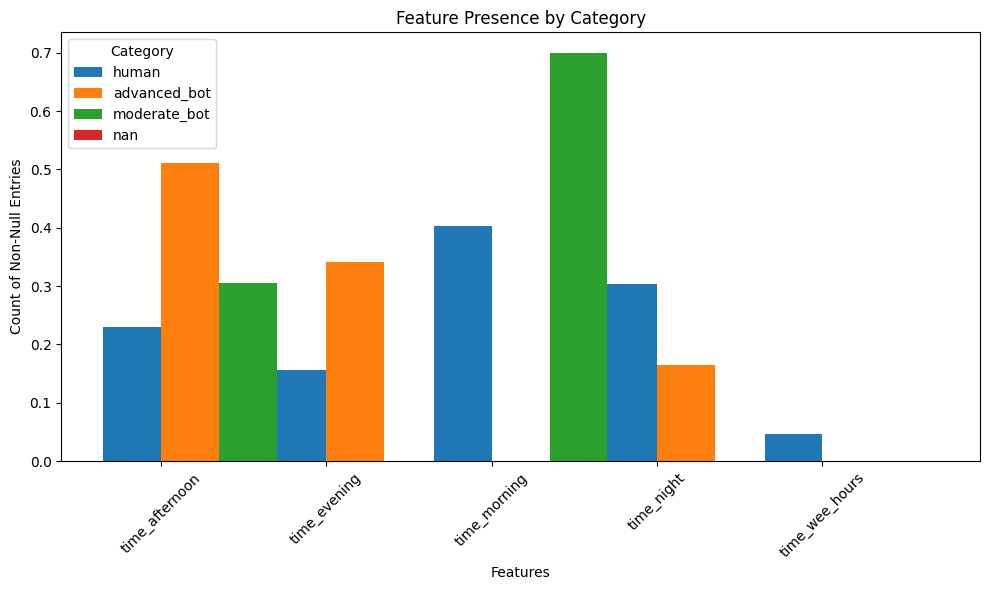

In [32]:
import pandas as pd

cols = ['time_afternoon', 'time_evening', 'time_morning', 'time_night', 'time_wee_hours']
category_col = 'label'

fig, ax = plt.subplots(figsize=(10, 6))
categories = combined_df[category_col].unique()

bar_width = 0.35
x = range(len(cols))

for i, cat in enumerate(categories):
    total_count = len(combined_df[combined_df[category_col] == cat])
    counts = [(combined_df[combined_df[category_col] == cat][col] != 0).sum()/total_count for col in cols]
    print(total_count, cat,counts)
    ax.bar([pos + i * bar_width for pos in x], counts, width=bar_width, label=str(cat))

# Labeling
ax.set_xlabel('Features')
ax.set_ylabel('Count of Non-Null Entries')
ax.set_title('Feature Presence by Category')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(cols, rotation=45)
ax.legend(title='Category')

plt.tight_layout()
plt.show()
